In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [331]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [332]:
df = pd.read_csv('datasets/train.csv')

In [333]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [334]:
df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [335]:
#df['SalePrice'] = np.log(df['SalePrice'])

In [336]:
df['Alley'].fillna('anull', inplace=True)

# Null lot frontage likely means there is 0 linear feet of street connected to property
df[df['Lot Frontage'].isna()]
df['Lot Frontage'].fillna(0, inplace=True)

# Fill null garage cars with 0
df['Garage Cars'].fillna(0, inplace=True)

# Filling with 0's because most likely no veneer area
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

df['Mas Vnr Type'].fillna('anull', inplace=True)

df['Bsmt Cond'].fillna('anull', inplace=True)

# Replacing null values with a_null, then dropping that dummy column 
df['Bsmt Qual'].fillna('anull', inplace=True)

df['Bsmt Exposure'].fillna('anull',inplace=True)

df['BsmtFin Type 1'].fillna('anull', inplace=True)

df['BsmtFin SF 1'].fillna(0, inplace=True)

df['BsmtFin SF 2'].fillna(0, inplace=True)

df['Bsmt Unf SF'].fillna(0, inplace=True)

df['Total Bsmt SF'].fillna(0, inplace=True)

df['Bsmt Full Bath'].fillna(0, inplace=True)

df['Bsmt Half Bath'].fillna(0, inplace=True)

df['Fireplace Qu'].fillna('anull', inplace=True)

df['Garage Type'].fillna('anull',inplace=True)

df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median(), inplace=True)

df['Garage Finish'].fillna('anull', inplace=True)

df['Garage Cars'].fillna(0, inplace=True)

df['Garage Area'].fillna(0, inplace=True)

df['Garage Qual'].fillna('anull', inplace=True)

df['Garage Cond'].fillna('anull', inplace=True)

df['Pool QC'].fillna('anull', inplace=True)

df['Fence'].fillna('anull', inplace=True)

df['Misc Feature'].fillna('anull', inplace=True)

In [337]:
# Making Dummy Variables

In [338]:
column_lst = []
for column in df.columns:
    if df[column].dtype == 'object':
        column_lst.append(column)

In [339]:
x_num = df._get_numeric_data().columns.drop(['SalePrice']).to_list()

In [340]:
# Cannot drop first because only 4 unique values in training, but 5 unique values in test

# for column in column_lst:
#     if column != 'Kitchen Qual':
#         df = pd.get_dummies(data=df, columns=[column], drop_first=True)
#     else:
#         df = pd.get_dummies(data=df, columns=['Kitchen Qual'])

# df = pd.get_dummies(data=df, columns=['MS SubClass'])

In [341]:
# dummy neighborhood
# df = pd.get_dummies(data=df, columns=['Neighborhood'], drop_first=True)

In [342]:
# Cannot drop first because only 4 unique values in training, but 5 unique values in test
# df = pd.get_dummies(data=df, columns=['Kitchen Qual'])

In [343]:
# dummy basement qual
# df = pd.get_dummies(data=df, columns=['Bsmt Qual'], drop_first=True)

In [344]:
# df = pd.get_dummies(data=df, columns=['MS SubClass'], drop_first=True)

In [345]:
# df = pd.get_dummies(data=df, columns=['Lot Config'], drop_first=True)

In [346]:
X = df[x_num ]
#        + ['Kitchen Qual_Ex','Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA',
#      'MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70',
#      'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150',
#      'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190', 
#     'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_Po',
#      'Bsmt Qual_TA', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Neighborhood_Blueste',
#  'Neighborhood_BrDale',
#  'Neighborhood_ClearCr',
#  'Neighborhood_Crawfor',
#  'Neighborhood_Edwards',
#  'Neighborhood_GrnHill',
#  'Neighborhood_IDOTRR',
#  'Neighborhood_Landmrk',
#  'Neighborhood_MeadowV',
#  'Neighborhood_NPkVill',
#  'Neighborhood_NoRidge',
#  'Neighborhood_NridgHt',
#  'Neighborhood_OldTown',
#  'Neighborhood_SWISU',
#  'Neighborhood_StoneBr',
#  'Neighborhood_Veenker']]

In [347]:
# X = df[['Lot Area', 'Overall Cond', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Half Bath', 
#     'Bedroom AbvGr', 'Kitchen AbvGr', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 
#     'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
#     'Yr Sold', 'Lot Frontage', 'Kitchen Qual_Ex','Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA',
#      'MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70',
#      'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150',
#      'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190', 
#     'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_Po',
#      'Bsmt Qual_TA', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Neighborhood_Blueste',
#  'Neighborhood_BrDale',
#  'Neighborhood_ClearCr',
#  'Neighborhood_Crawfor',
#  'Neighborhood_Edwards',
#  'Neighborhood_GrnHill',
#  'Neighborhood_IDOTRR',
#  'Neighborhood_Landmrk',
#  'Neighborhood_MeadowV',
#  'Neighborhood_NPkVill',
#  'Neighborhood_NoRidge',
#  'Neighborhood_NridgHt',
#  'Neighborhood_OldTown',
#  'Neighborhood_SWISU',
#  'Neighborhood_StoneBr',
#  'Neighborhood_Veenker']]

# X = df[['Kitchen Qual_Ex','Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA',
#      'MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70',
#      'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150',
#      'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190', 
#     'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_Po',
#      'Bsmt Qual_TA', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Neighborhood_Blueste',
#  'Neighborhood_BrDale',
#  'Neighborhood_ClearCr',
#  'Neighborhood_Crawfor',
#  'Neighborhood_Edwards',
#  'Neighborhood_GrnHill',
#  'Neighborhood_IDOTRR',
#  'Neighborhood_Landmrk',
#  'Neighborhood_MeadowV',
#  'Neighborhood_NPkVill',
#  'Neighborhood_NoRidge',
#  'Neighborhood_NridgHt',
#  'Neighborhood_OldTown',
#  'Neighborhood_SWISU',
#  'Neighborhood_StoneBr',
#  'Neighborhood_Veenker']]


# df[df._get_numeric_data().columns.drop('SalePrice').to_list() 
#         + ['Kitchen Qual_Ex','Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA',
#      'MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70',
#      'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150',
#      'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190', 
#     'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_Po',
#      'Bsmt Qual_TA', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Neighborhood_Blueste',
#  'Neighborhood_BrDale',
#  'Neighborhood_ClearCr',
#  'Neighborhood_Crawfor',
#  'Neighborhood_Edwards',
#  'Neighborhood_GrnHill',
#  'Neighborhood_IDOTRR',
#  'Neighborhood_Landmrk',
#  'Neighborhood_MeadowV',
#  'Neighborhood_NPkVill',
#  'Neighborhood_NoRidge',
#  'Neighborhood_NridgHt',
#  'Neighborhood_OldTown',
#  'Neighborhood_SWISU',
#  'Neighborhood_StoneBr',
#  'Neighborhood_Veenker']]

#X = df[df.columns.drop('SalePrice').to_list()]

#X = df[df.columns.drop('SalePrice')]
#print(df.columns.drop('SalePrice'))
y = df['SalePrice']

<AxesSubplot:>

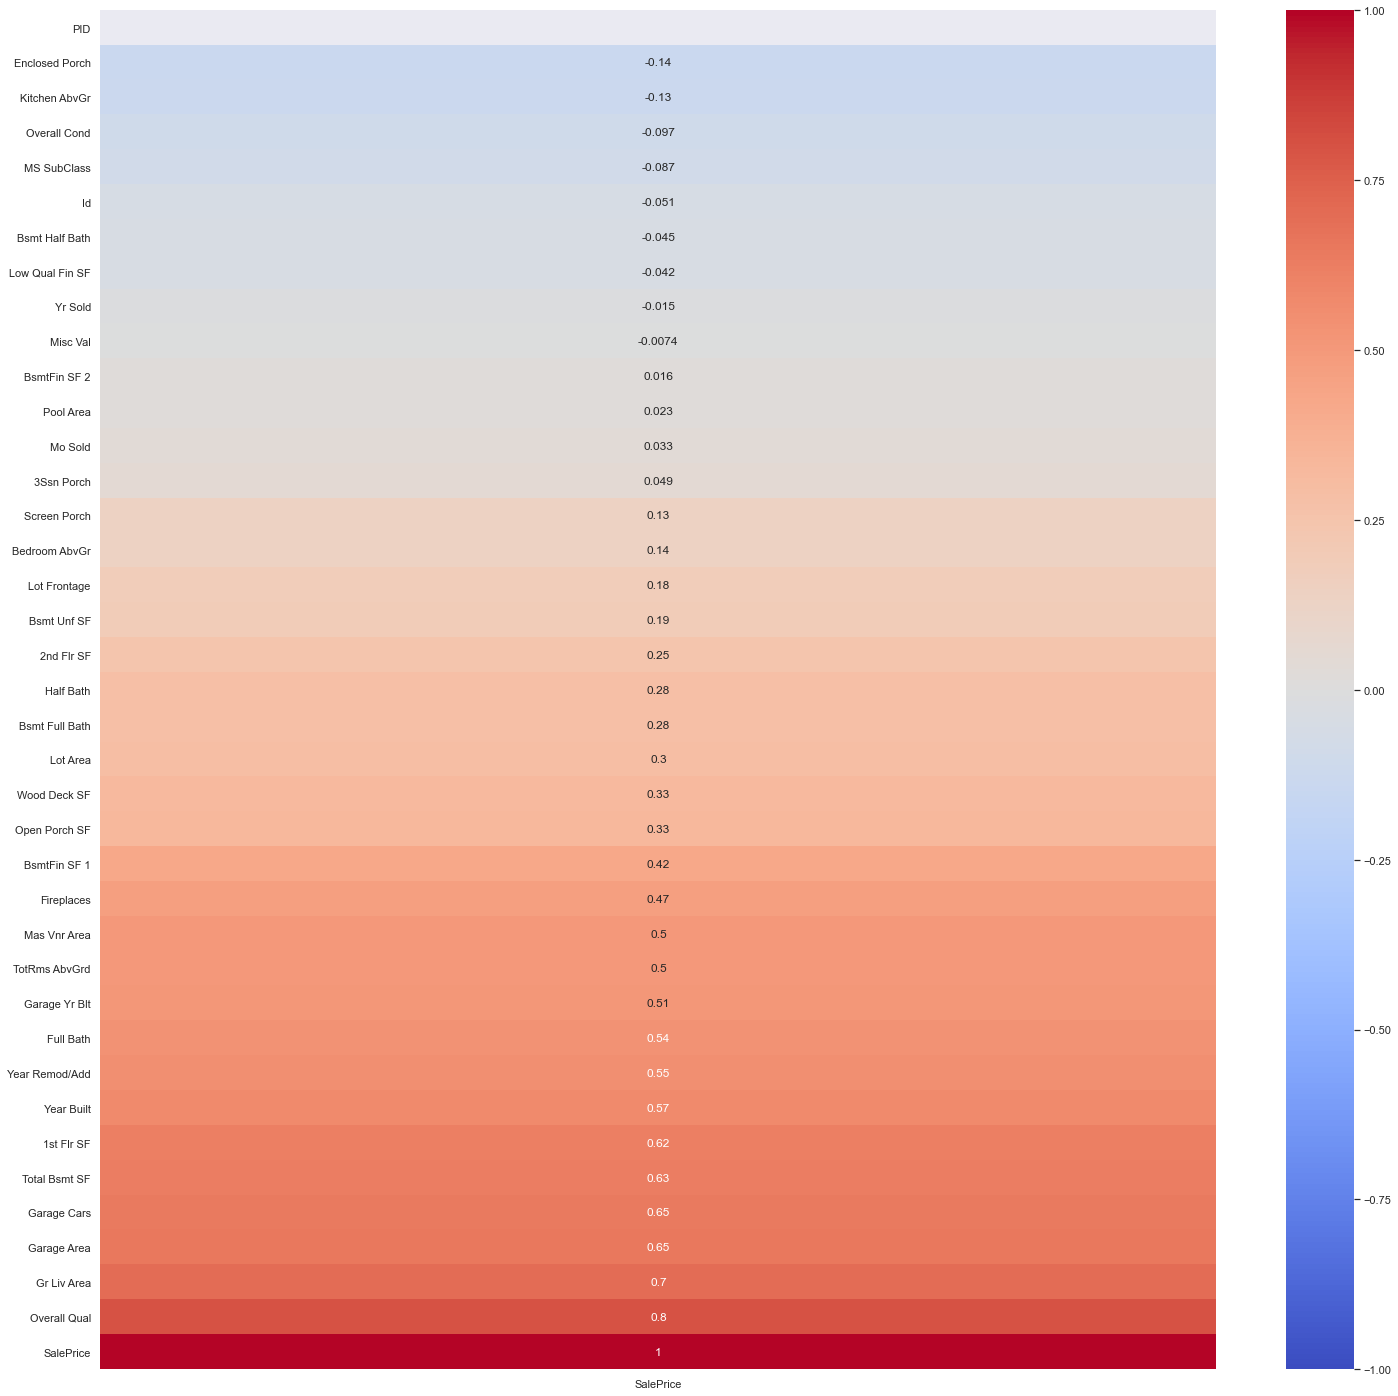

In [348]:
htmap = df[x_num]
#     ['Lot Area', 'Overall Cond', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Half Bath', 
#     'Bedroom AbvGr', 'Kitchen AbvGr', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 
#     'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
#     'Yr Sold', 'Lot Frontage', 'Kitchen Qual_Ex','Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA',
#      'MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70',
#      'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150',
#      'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190', 'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_Po',
#      'Bsmt Qual_TA', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'SalePrice']]

corr = df.corr()[['SalePrice']].sort_values('SalePrice')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(25,25))
sns.set(font_scale=1)
sns.heatmap(corr, annot=True,
           cmap='coolwarm',vmin=-1,vmax=1, mask=mask)

In [349]:
X.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)

In [351]:
y_test_log = y_test.map(np.log)
y_train_log = y_train.map(np.log)
#y_test = np.log(y_test)

In [352]:
#Linear Regression

In [353]:
ssc = StandardScaler()
Z_train = ssc.fit_transform(X_train)
Z_test = ssc.fit_transform(X_test)

In [357]:
lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [358]:
lr.score(X_train, y_train_log)

0.9323691930518045

In [359]:
lr.score(X_test, y_test_log)

0.8252204979005073

In [ ]:
#Lasso

In [ ]:
lasso_alphas = np.logspace(0, 175, 250)

lasso = LassoCV(alphas=lasso_alphas, cv=5, max_iter=50000)

lasso.fit(Z_train, y_train)

In [ ]:
len(lasso.coef_)

In [ ]:
lasso_predicts = lasso.predict(Z_train)
#pred_prices = np.exp(lasso_predicts)

In [ ]:
# from sklearn import metrics

# metrics.r2_score(y_train, pred_prices)
lasso.score(Z_train, y_train)

In [ ]:
lasso.score(Z_test, y_test)

In [ ]:
#lasso_resids = y_train - pred_prices

plt.figure(figsize=(10,10))

#plt.scatter(x=pred_prices, y=lasso_resids)

In [ ]:
lasso_test_predicts = lasso.predict(Z_test)
lasso_test_resids = y_test - lasso_test_predicts

plt.figure(figsize=(10,10))
plt.scatter(x=lasso_test_predicts, y=lasso_test_resids)

In [ ]:
#lasso_resids.max()

In [ ]:
# Ridge

In [ ]:
ridge_alpha = np.logspace(0, 150, 250)
ridge_cv = RidgeCV(alphas=ridge_alpha, scoring='r2', cv=5)
ridge_cv.fit(Z_train, y_train)
ridge_cv.score(Z_train, y_train)

In [ ]:
ridge_cv.score(Z_test, y_test)

In [ ]:
# Test dataset

In [ ]:
df_test = pd.read_csv('datasets/test.csv')

In [ ]:
df_test['Alley'].fillna('anull', inplace=True)


df_test['Lot Frontage'].fillna(0, inplace=True)

# Fill null garage cars with 0
df_test['Garage Cars'].fillna(0, inplace=True)

# Filling with 0's because most likely no veneer area
df_test['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

df_test['Mas Vnr Type'].fillna('anull', inplace=True)

df_test['Bsmt Cond'].fillna('anull', inplace=True)

# Replacing null values with a_null, then dropping that dummy column 
df_test['Bsmt Qual'].fillna('anull', inplace=True)

df_test['Bsmt Exposure'].fillna('anull',inplace=True)

df_test['BsmtFin Type 1'].fillna('anull', inplace=True)

df_test['BsmtFin SF 1'].fillna(0, inplace=True)

df_test['BsmtFin SF 2'].fillna(0, inplace=True)

df_test['Bsmt Unf SF'].fillna(0, inplace=True)

df_test['Total Bsmt SF'].fillna(0, inplace=True)

df_test['Bsmt Full Bath'].fillna(0, inplace=True)

df_test['Bsmt Half Bath'].fillna(0, inplace=True)

df_test['Fireplace Qu'].fillna('anull', inplace=True)

df_test['Garage Type'].fillna('anull',inplace=True)

df_test['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median(), inplace=True)

df_test['Garage Finish'].fillna('anull', inplace=True)

df_test['Garage Cars'].fillna(0, inplace=True)

df_test['Garage Area'].fillna(0, inplace=True)

df_test['Garage Qual'].fillna('anull', inplace=True)

df_test['Garage Cond'].fillna('anull', inplace=True)

df_test['Pool QC'].fillna('anull', inplace=True)

df_test['Fence'].fillna('anull', inplace=True)

df_test['Misc Feature'].fillna('anull', inplace=True)

In [ ]:
# df_test['Lot Frontage'].fillna(0, inplace=True)

In [ ]:
# df_test['Garage Cars'].fillna(0, inplace=True)

In [ ]:
# df_test = pd.get_dummies(data=df_test, columns=['Kitchen Qual'])

In [ ]:
# df_test['Bsmt Qual'].fillna('A_null', inplace=True)
# df_test = pd.get_dummies(data=df_test, columns=['Bsmt Qual'], drop_first=True)

In [ ]:
# df_test = pd.get_dummies(data=df_test, columns=['MS SubClass'], drop_first=True)

In [ ]:
# df_test = pd.get_dummies(data=df_test, columns=['Lot Config'], drop_first=True)

In [ ]:
column_lst_tst = []
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        column_lst_tst.append(column)

In [ ]:
for column in column_lst_tst:
    df_test = pd.get_dummies(data=df_test, columns=[column], drop_first=True)


df_test = pd.get_dummies(data=df_test, columns=['MS SubClass'],drop_first=True)
df_test[['MS SubClass_150', 'Neighborhood_Landmrk', 'Kitchen Qual_Ex', 'Neighborhood_GrnHill']] = 0
# df_test[['Bsmt Cond_Fa', 'Bsmt Cond_Po', 'Condition 2_Feedr',
#        'Condition 2_PosN', 'Condition 2_RRAe', 'Condition 2_RRAn',
#        'Condition 2_RRNn', 'Electrical_Mix', 'Exterior 1st_CBlock',
#        'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'Exterior 2nd_Stone',
#        'Functional_Sal', 'Functional_Sev', 'Garage Qual_Fa',
#        'Heating QC_Po', 'Heating_OthW', 'Heating_Wall',
#        'MS Zoning_C (all)', 'Misc Feature_Gar2', 'Misc Feature_TenC',
#        'Pool QC_Fa', 'Pool QC_Gd', 'Roof Matl_CompShg',
#        'Roof Matl_Membran', 'Utilities_NoSeWa']] = 0

In [ ]:
len(df._get_numeric_data().columns.to_list())

In [ ]:
np.setdiff1d(df._get_numeric_data().columns.to_list(), df_test._get_numeric_data().columns.to_list())

In [ ]:
set(df._get_numeric_data().columns.to_list())
set(df_test._get_numeric_data().columns.to_list())

In [ ]:
X_test_df = df_test[['Lot Area', 'Overall Cond', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Half Bath', 
    'Bedroom AbvGr', 'Kitchen AbvGr', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 
    'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
    'Yr Sold', 'Lot Frontage', 'Kitchen Qual_Ex','Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA',
     'MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70',
     'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150',
     'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190', 
    'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_Po',
     'Bsmt Qual_TA', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_GrnHill',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker']]

In [ ]:
Z_test_df = ssc.fit_transform(X_test_df)

In [ ]:
test_preds = lasso.predict(Z_test_df)

In [ ]:
test_saleprice = pd.DataFrame(df_test['Id'])
test_saleprice['SalePrice'] = test_preds

In [ ]:
test_saleprice

In [ ]:
#test_saleprice.to_csv('output/prediction_14.csv', index=False)